# How did the spreading of COVID-19 and the regulations in association with it influence the game market, in particular the game League of Legends, in terms of monthly player numbers, and popularity in Europe ?

By:
Babiak Chiara
Führer Angelika
Rinner Clemens

Libraries Used:
- pandas
- request
- json
- datetime
- os
- plotly
- influxdb_client
- influxdb_client.client.write_api import SYNCHRONOUS
- influxdb import InfluxDBClient
- bs4
- urllib.request
- time

Conclusion and Story telling can be found at the end of the Jupyter Notebook (Story) , while the rest is the code how-to and documentation of the code alongside with a bit of story telling.

As one knows, the spreading of the Coronavirus has lead most of the world into strong quarantine regulations. These regulations made everyone stay at home. Being made to stay at home, people started to take a bigger interest in finding new hobbies, experimenting new fields of interests and deepen there current hobbies.

Since leaving your house was an issue, all of these hobbies had to be indoor, therefore one of the booming industries next to the at-home-sports industry was the gaming market. People started to invest more into video games and sharpen their skills. But how much was the gaming industry really impacted by these changes and during which time-period was the boom the strongest? Is it really true that thanks to COVID-19 the industry started rapidly growing again?

To find an answer to these questions we first had to collect COVID-19 data.
The Data we decided to collect was the following:
- Data of each month during the first COVID-19 caused quarantine
- Number of infections per Month in correlation of population in each European country

Therefore we had to find a Data Source , which is able to deliver that data to us. To do so we have researched several APIs, which can be of use. One of these APIs is Coronavirus COVID19 API (https://rapidapi.com/api-sports/api/covid-193).

This API provides up-to-date data about Coronavirus outbreak. Including numbers about confirmed cases, deaths and recovered.

Of course since COVID is a really recent topics there were other APIs to choose from as well, the problem with these were limited rate limits, country limitations (e.g.: only the US),

# Data Source

To answer our question we have to collect data which in our case would be :
- covid 19 data (europe centered) from an api
- game data (count of players)
- league of legends data

These three main sources are here to visualize and help us understand if covid 19 had any influence on game popularity.

## COVID-19 Data

Before actually analyzing, visualizing, describing and working with the data we have to collect all the needed data.
As previously mentioned we want the data of the first every quarantine, for which the main timespan went from March 2020 til Mai 2020.

To get this Data we have to request it from our Coronavirus Tracker API. The results of these requests are going to be in json format, so we have to work with the json library as well.

In [106]:
import pandas as pd
import requests
import json
import datetime
import time

Since we want each country we are setting up a List, which contains all countries of europe.

In [103]:
# we need the country list
# country list is parted in three seperate lists to keep the rate limit low


# keep only in eu since those are also the regulation countries and bigger servers are located there as well
europe_country_list = ["Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Norway", "Poland", "Portugal" , "Romania", "Slovakia", "Slovenia", "Spain", "Sweden" ]
# europe_country_list = ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kazakhstan", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Macedonia", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "Norway", "Poland","Portugal","Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Turkey", "Ukraine","United Kingdom", "Vatican City"]

print(f"Number of Countries: {len(europe_country_list)}" )

Number of Countries: 30


In the next step we use this list ot gather the information per month and for each country.

In [104]:
url = "https://covid-193.p.rapidapi.com/history"

headers = {
	"X-RapidAPI-Key": "ba735a5542msh0672a6a248c9225p1ba64djsnfd32c8982360",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}


### March Data

In [ ]:
# collect the results for each country in that specific timeframe
# march
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 4, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        # add a sleep into the while loop to let requests go through better
        time.sleep(10)
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/march/{country}_march.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    # set start date again
    start_date = datetime.date(2020, 3, 1)

### April Data

In [ ]:
# april
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 5, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        time.sleep(10)
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/april/{country}_april.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 4, 1)

### Mai Data

In [ ]:
# mai
start_date = datetime.date(2020, 5, 1)
end_date = datetime.date(2020, 6, 1)
delta = datetime.timedelta(days=1)

for country in europe_country_list:
    j = []
    while start_date <= end_date:
        time.sleep(10)
        querystring = {"country":f"{country}","day":f"{start_date}"}
        result = requests.request("GET", url, headers=headers, params=querystring)
        country_json = result.json()
        # put it into the countries json
        j.append(country_json)
        start_date += delta
    # save the json
    with open(f"covid_data/api_data/mai/{country}_mai.json", "w") as jsonfile:
        json.dump(j, jsonfile)
    start_date = datetime.date(2020, 5, 1)

Now that all the data has been collected we should also take a look upon what exactly has been collected and what the data consists of. For each country in our Europe List we collected the *History* of each country. When collecting the history one gets the following data for each date passed:
- day
- number of results
- response : continent, country, population, cases, deaths, tests

We are most interested in the cases parameter alongside with which regulations where present during that time.
When looking at the cases for each date per country we get the following:
- new cases
- active cases
- critical cases
- recovered cases
- total cases

Let's take a look at one example:

In [ ]:
import json

with open('covid_data/api_data/april/Albania_april.json', 'r') as handle:
    parsed = json.load(handle)

print(json.dumps(parsed, indent=4))

As one can also see: for each date given we get multiple statistical responses since the covid data was obviously updated regularly over the day. We will use the latest given values of the day for our inspections. Furthermore we will only use the number of total cases, since the number of new cases has been stated differently per country ( either they say how much in comparison to before or the total number + the new number ).

So to make it easier for us we will create 3 Dataframes, in which each dataframe represents one month with countries, dates and the total cases of that date.

In [ ]:
for song in parsed:
    # country
    print(song['parameters']["country"])
    # total numbers
    print(song['response'][0]["cases"]["total"])
    # date and time
    print(song['response'][0]["time"])

Now we will do exactly what we did there for each month and all the files available. If there is nothing to catch from that country in terms of total number of cases or an error has occurecd then nothing will be added to the dataframe

### April

In [ ]:
# empty dataframe
april_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

In [ ]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/april'

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            april_df = april_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

### March

In [ ]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/march'

march_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            march_df = march_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

### Mai

In [ ]:
# iterate through the folder, parse each file and add the information into the dataframe
import os
# assign directory
directory = 'covid_data/api_data/mai'

mai_df = pd.DataFrame(columns = ["Country", "DateTime", "Total Cases"])

# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    with open(f, 'r') as handle:
        parsed = json.load(handle)
        for info in parsed:
            # country
            country = info['parameters']["country"]
            # total numbers
            total_cases = info['response'][0]["cases"]["total"]
            # date and time
            date_time = info['response'][0]["time"]
            # add this into the dataframe
            mai_df = mai_df.append({'Country' : country, 'DateTime' : date_time, 'Total Cases' : total_cases}, ignore_index = True)
    print(country)

## Enrichment - Regulations
In Big Data it is important that the Data is not only collected, but that is also has some Value. To make Data valuable we have to enrich the data, meaning we bring some context to it. This can be achieved by forming a context as said. In our case this is going to mean that just the total number of cases is not enough. Next to the cases we need the regulations the countries have set during those specific months - Were bars closed? Were the clubs closed? Were people able to meet outside ? and so on.

Since these factors are also of great importance.

To do so we have found a .csv file which provides us with all the information concerning the countries regulations and how long these regulations were up and therefore had to be followed.
This data was found on the following website: https://www.ecdc.europa.eu/en/publications-data/download-data-response-measures-covid-19

In [26]:
regulations_df = pd.read_csv("covid_data/country_regulations.csv")
regulations_df.head()

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13
1,Austria,AdaptationOfWorkplace,2021-04-01,2022-03-05
2,Austria,BanOnAllEvents,2020-11-03,2021-05-18
3,Austria,ClosDaycare,2020-03-16,2020-05-04
4,Austria,ClosHigh,2020-03-16,2020-09-30


As one can see we get the Country the Response measure and the date when the measure started and until when it was present.
The Response Measures in this dataframe are:

In [27]:
regulations_df.Response_measure.unique()

array(['AdaptationOfWorkplace', 'BanOnAllEvents', 'ClosDaycare',
       'ClosHigh', 'ClosHighPartial', 'ClosPrim', 'ClosPrimPartial',
       'ClosPubAny', 'ClosPubAnyPartial', 'ClosSec', 'ClosSecPartial',
       'EntertainmentVenues', 'EntertainmentVenuesPartial',
       'GymsSportsCentres', 'GymsSportsCentresPartial',
       'HotelsOtherAccommodation', 'HotelsOtherAccommodationPartial',
       'IndoorOver100', 'IndoorOver1000', 'IndoorOver50', 'IndoorOver500',
       'MasksMandatoryAllSpaces', 'MasksMandatoryAllSpacesPartial',
       'MasksMandatoryClosedSpaces', 'MasksMandatoryClosedSpacesPartial',
       'MasksVoluntaryClosedSpacesPartial', 'MassGather50',
       'MassGather50Partial', 'MassGatherAll', 'MassGatherAllPartial',
       'NonEssentialShops', 'NonEssentialShopsPartial', 'OutdoorOver100',
       'OutdoorOver1000', 'OutdoorOver500', 'PlaceOfWorship',
       'PlaceOfWorshipPartial', 'PrivateGatheringRestrictions',
       'PrivateGatheringRestrictionsPartial',
       'Quarant

Those regulations mean the following:

- StayHomeOrder = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’)
- RegionalStayHomeOrder = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’)
- StayHomeGen = Stay-at-home recommendations for the general population (which are voluntary or not enforced)
- StayHomeRiskG = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.)
- SocialCircle = Social circle/bubble to limit social contacts e.g. to limited number of households
- PrivateGatheringRestrictions = Restrictions on private gatherings
- ClosDaycare = Closure of educational institutions: daycare or nursery.
- ClosPrim = Closure of educational institutions: primary schools.
- ClosSec = Closure of educational institutions: secondary schools.
- ClosHigh = Closure of educational institutions: higher education
- MassGatherAll = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included)
- BanOnAllEvents = Interventions are in place to limit all indoor/outdoor mass/public gatherings
- IndoorOver50 = Interventions are in place to limit indoor mass/public gatherings of over 50 participants
- IndoorOver100 = Interventions are in place to limit indoor mass/public gatherings of over 100 participants
- IndoorOver500 = Interventions are in place to limit indoor mass/public gatherings of over 500 participants
- IndoorOver1000 = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants
- OutdoorOver50 = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants
- OutdoorOver100 = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants
- OutdoorOver500 = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants
- OutdoorOver1000 = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants
- ClosPubAny = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers, etc).
- EntertainmentVenues = Closure of entertainment venues
- ClosureOfPublicTransport = Closure of public transport
- GymsSportsCentres = Closure of gyms/sports centres
- HotelsAccommodation = Closure of hotels/accommodation services
- NonEssentialShops = Closures of non-essential shops
- PlaceOfWorship = Closure of places of worship
- RestaurantsCafes = Closure of restaurants and cafes/bars
- MasksVoluntaryAllSpaces = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced)
- MasksVoluntaryClosedSpaces = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced)
- MasksMandatoryAllSpaces = Protective mask use in all public spaces on mandatory basis (enforced by law)
- MasksMandatoryClosedSpaces = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law)
- Teleworking = Teleworking recommendation
- AdaptationOfWorkplace = Adaptation of workplaces (e.g. to reduce risk of transmission)
- WorkplaceClosures = Closures of workplaces
- StayHomeOrderPartial = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- RegionalStayHomeOrderPartial = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- StayHomeGenPartial = Stay-at-home recommendations for the general population (which are voluntary or not enforced) – partially relaxed measure
- StayHomeRiskGPartial = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.) – partially relaxed measure
- SocialCirclePartial = Social circle/bubble to limit social contacts e.g. to limited number of households – partially relaxed measure
- PrivateGatheringRestrictionsPartial = Restrictions on private gatherings – partially relaxed measure
- ClosDaycarePartial = Closure of educational institutions: daycare or nursery –partially relaxed measure
- ClosPrimPartial = Closure of educational institutions: primary schools – partially relaxed measure
- ClosSecPartial = Closure of educational institutions: secondary schools –partially relaxed measure
- ClosHighPartial = Closure of educational institutions: higher education – partially relaxed measure
- MassGatherAllPartial = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included) – partially relaxed measure
- BanOnAllEventsPartial = Interventions are in place to limit all indoor/outdoor mass/public gatherings – partially relaxed measure
- IndoorOver50Partial = Interventions are in place to limit indoor mass/public gatherings of over 50 participants – partially relaxed measure
- IndoorOver100Partial = Interventions are in place to limit indoor mass/public gatherings of over 100 participants – partially relaxed measure
- IndoorOver500Partial = Interventions are in place to limit indoor mass/public gatherings of over 500 participants – partially relaxed measure
- IndoorOver1000Partial = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants – partially relaxed measure
- OutdoorOver50Partial = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants – partially relaxed measure
- OutdoorOver100Partial = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants – partially relaxed measure
- OutdoorOver500Partial = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants – partially relaxed measure
- OutdoorOver1000Partial = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants – partially relaxed measure
- ClosPubAnyPartial = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers etc) – partially relaxed measure
- EntertainmentVenuesPartial = Closure of entertainment venues – partially relaxed measure
- ClosureOfPublicTransportPartial = Closure of public transport – partially relaxed measure
- GymsSportsCentresPartial = Closure of gyms/sports centres – partially relaxed measure
- HotelsAccommodationPartial = Closure of hotels/accommodation services – partially relaxed measure
- NonEssentialShopsPartial = Closures of non-essential shops – partially relaxed measure
- PlaceOfWorshipPartial = Closure of places of worship – partially relaxed measure
- RestaurantsCafesPartial = Closure of restaurants and cafes/bars – partially relaxed measure
- MasksVoluntaryAllSpacesPartial = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksVoluntaryClosedSpacesPartial = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksMandatoryAllSpacesPartial = Protective mask use in all public spaces on mandatory basis (enforced by law) – partially relaxed measure
- MasksMandatoryClosedSpacesPartial = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law) – partially relaxed measure
- TeleworkingPartial = Teleworking recommendation or workplace closures – partially relaxed measure
- AdaptationOfWorkplacePartial = Adaptation of workplaces (e.g. to reduce risk of transmission) – partially relaxed measure
- WorkplaceClosuresPartial = Closures of workplaces – partially relaxed measure

When looking at the country we have 29 countries present in the dataset , and these are the countries we have:

In [28]:
regulations_df.Country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

We are short of 20 countries in this dataset, which will lead to a slight miss-interpretation.

Since we have the covid 19 numbers , as well as the incoming player counts per game seperated through months that are interesting to us we will do the exact same thing here. We will sort out every measure that has started before or after March, April or Mai.

In [29]:
# create the dataframes out of the csv based on the months in the date , since we only use 2020 data everything that was started in 2021 or any other year will be deleted
regulations_df['date_start']= pd.to_datetime(regulations_df['date_start'])
regulations_df['date_end']= pd.to_datetime(regulations_df['date_end'])

# check for correct types
print("Data types of columns: ")
print(regulations_df.dtypes)

# now let's delete all that did not start in 2020 between march and mai
# regulations_df = regulations_df[~(regulations_df['date_end'] < '2020-02-29')]
regulations_df = regulations_df[~(regulations_df['date_start'] > '2020-05-31')]
regulations_df

Data types of columns: 
Country                     object
Response_measure            object
date_start          datetime64[ns]
date_end            datetime64[ns]
dtype: object


,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13
3,Austria,ClosDaycare,2020-03-16,2020-05-04
4,Austria,ClosHigh,2020-03-16,2020-09-30
8,Austria,ClosPrimPartial,2020-03-16,2020-05-18
9,Austria,ClosPubAny,2020-03-16,2020-04-13
...,...,...,...,...
2007,Sweden,MassGather50,2020-03-29,2021-05-31
2009,Sweden,MassGatherAll,2020-03-12,2021-09-29
2012,Sweden,OutdoorOver50,2020-03-29,2021-05-31
2019,Sweden,StayHomeRiskG,2020-04-01,2020-10-22


Now we want to take a look at only those regulations, that made people stay at home, spend more time on the pc. Those would include closing Pubs, prohibiting events and so on.

In [30]:
# removal of all rows that include any kind of mask regulations:
# MasksVoluntaryAllSpaces = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced)
# MasksVoluntaryClosedSpaces = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced)
# MasksMandatoryAllSpaces = Protective mask use in all public spaces on mandatory basis (enforced by law)
# MasksMandatoryClosedSpaces = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law)
regulations_df = regulations_df[regulations_df.Response_measure != "MasksVoluntaryAllSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksVoluntaryClosedSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksMandatoryAllSpaces"]
regulations_df = regulations_df[regulations_df.Response_measure != "MasksMandatoryClosedSpaces"]
regulations_df

,Country,Response_measure,date_start,date_end
0,Austria,AdaptationOfWorkplace,2020-03-16,2020-04-13
3,Austria,ClosDaycare,2020-03-16,2020-05-04
4,Austria,ClosHigh,2020-03-16,2020-09-30
8,Austria,ClosPrimPartial,2020-03-16,2020-05-18
9,Austria,ClosPubAny,2020-03-16,2020-04-13
...,...,...,...,...
2007,Sweden,MassGather50,2020-03-29,2021-05-31
2009,Sweden,MassGatherAll,2020-03-12,2021-09-29
2012,Sweden,OutdoorOver50,2020-03-29,2021-05-31
2019,Sweden,StayHomeRiskG,2020-04-01,2020-10-22


We will now take a look at the bans/restrictions and regulations in forms of graphs:

In [31]:
# we want to count the occurence per day of a certain regulation
# now lets iterate through march
march_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 3, 1)
end_date = datetime.date(2020, 4, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 3, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            march_reg_df = march_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(march_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
march_reg_df = march_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-31-5bf19aa1a654>:13: FutureWarning:

Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.



                 Regulation        Date
0     AdaptationOfWorkplace  2020-03-16
1     AdaptationOfWorkplace  2020-03-17
2     AdaptationOfWorkplace  2020-03-18
3     AdaptationOfWorkplace  2020-03-19
4     AdaptationOfWorkplace  2020-03-20
...                     ...         ...
8351            Teleworking  2020-03-28
8352            Teleworking  2020-03-29
8353            Teleworking  2020-03-30
8354            Teleworking  2020-03-31
8355            Teleworking  2020-04-01

[8356 rows x 2 columns]


### March Regulations

Now we have a dataframe that shows us how many countries had certain regulations on each day. We can now plot all of these.

In [32]:
march_reg_df

Regulation             Date      
AdaptationOfWorkplace  2020-03-10    1
                       2020-03-11    1
                       2020-03-12    1
                       2020-03-13    1
                       2020-03-14    1
                                    ..
WorkplaceClosures      2020-03-28    5
                       2020-03-29    5
                       2020-03-30    5
                       2020-03-31    5
                       2020-04-01    5
Length: 1213, dtype: int64

In [33]:
march_reg_df = march_reg_df.reset_index()

In [34]:
march_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [35]:
march_reg_df

,Regulation,Date,num_countries
0,AdaptationOfWorkplace,2020-03-10,1
1,AdaptationOfWorkplace,2020-03-11,1
2,AdaptationOfWorkplace,2020-03-12,1
3,AdaptationOfWorkplace,2020-03-13,1
4,AdaptationOfWorkplace,2020-03-14,1
...,...,...,...
1208,WorkplaceClosures,2020-03-28,5
1209,WorkplaceClosures,2020-03-29,5
1210,WorkplaceClosures,2020-03-30,5
1211,WorkplaceClosures,2020-03-31,5


In [36]:
import matplotlib.pyplot as plt

# lets clean the df a bit more
# MasksVoluntaryAllSpacesPartial = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced) – partially relaxed measure
# MasksVoluntaryClosedSpacesPartial = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced) – partially relaxed measure
# MasksMandatoryAllSpacesPartial = Protective mask use in all public spaces on mandatory basis (enforced by law) – partially relaxed measure
# MasksMandatoryClosedSpacesPartial = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law) – partially relaxed measure
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryAllSpaces"]
march_reg_df = march_reg_df[march_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [37]:
import plotly.express as px

fig = px.line(march_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()


### April Regulations

Now lets take a look at the regulations present in april.

In [38]:
april_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 4, 1)
end_date = datetime.date(2020, 5, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 4, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            april_reg_df = april_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(april_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
april_reg_df = april_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-38-510dabad68ba>:11: FutureWarning:

Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.



                  Regulation        Date
0      AdaptationOfWorkplace  2020-04-01
1      AdaptationOfWorkplace  2020-04-02
2      AdaptationOfWorkplace  2020-04-03
3      AdaptationOfWorkplace  2020-04-04
4      AdaptationOfWorkplace  2020-04-05
...                      ...         ...
14039            Teleworking  2020-04-27
14040            Teleworking  2020-04-28
14041            Teleworking  2020-04-29
14042            Teleworking  2020-04-30
14043            Teleworking  2020-05-01

[14044 rows x 2 columns]


In [39]:
april_reg_df = april_reg_df.reset_index()
april_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [40]:
april_reg_df

,Regulation,Date,num_countries
0,AdaptationOfWorkplace,2020-04-01,5
1,AdaptationOfWorkplace,2020-04-02,6
2,AdaptationOfWorkplace,2020-04-03,6
3,AdaptationOfWorkplace,2020-04-04,6
4,AdaptationOfWorkplace,2020-04-05,6
...,...,...,...
1694,WorkplaceClosuresPartial,2020-04-27,1
1695,WorkplaceClosuresPartial,2020-04-28,1
1696,WorkplaceClosuresPartial,2020-04-29,1
1697,WorkplaceClosuresPartial,2020-04-30,1


In [41]:
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryAllSpaces"]
april_reg_df = april_reg_df[april_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [42]:
fig = px.line(april_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

### Mai Regulations

The last month we have to take a look at is Mai.

In [43]:
mai_reg_df = pd.DataFrame(columns = ["Regulation", "Date"])
start_date = datetime.date(2020, 5, 1)
end_date = datetime.date(2020, 6, 1)
delta = datetime.timedelta(days=1)

# for all unique regulations so lets itearte through the rows of the dataframe
for index, row in regulations_df.iterrows():
    start_date = datetime.date(2020, 5, 1)
    while start_date <= end_date:
        # get timedelta
        if start_date >= row["date_start"] and start_date <= row["date_end"]:
            regulation = row["Response_measure"]
            # add into dataframe
            mai_reg_df = mai_reg_df.append({'Regulation' : regulation, 'Date' : start_date}, ignore_index = True)
        start_date+=delta

print(mai_reg_df)
# now lets create a count column and add the occurence of how many countries had that regulation on that day
mai_reg_df = mai_reg_df.pivot_table(columns=['Regulation','Date'], aggfunc='size')

<ipython-input-43-d606e63849c2>:11: FutureWarning:

Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.



        Regulation        Date
0      ClosDaycare  2020-05-01
1      ClosDaycare  2020-05-02
2      ClosDaycare  2020-05-03
3      ClosDaycare  2020-05-04
4         ClosHigh  2020-05-01
...            ...         ...
12963  Teleworking  2020-05-28
12964  Teleworking  2020-05-29
12965  Teleworking  2020-05-30
12966  Teleworking  2020-05-31
12967  Teleworking  2020-06-01

[12968 rows x 2 columns]


In [44]:
mai_reg_df = mai_reg_df.reset_index()
mai_reg_df.columns = ['Regulation', 'Date', 'num_countries']

In [45]:
mai_reg_df

,Regulation,Date,num_countries
0,AdaptationOfWorkplace,2020-05-01,5
1,AdaptationOfWorkplace,2020-05-02,5
2,AdaptationOfWorkplace,2020-05-03,5
3,AdaptationOfWorkplace,2020-05-04,5
4,AdaptationOfWorkplace,2020-05-05,5
...,...,...,...
1767,WorkplaceClosuresPartial,2020-05-28,1
1768,WorkplaceClosuresPartial,2020-05-29,1
1769,WorkplaceClosuresPartial,2020-05-30,1
1770,WorkplaceClosuresPartial,2020-05-31,1


In [46]:
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryAllSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryClosedSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryAllSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryClosedSpacesPartial"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryAllSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksVoluntaryClosedSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryAllSpaces"]
mai_reg_df = mai_reg_df[mai_reg_df.Regulation != "MasksMandatoryClosedSpaces"]

In [47]:
fig = px.line(mai_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

## InfluxDB
### Setting up the InfluxDB client

In [ ]:
#import the influxdb client
import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb import InfluxDBClient

In [ ]:
# name of the bucket you previously defined
bucket = "Covid_Data"

# name of the organization you previously defined
org = "AI_Elite"

# you can access the token in the UI
token = "xKaMOhaUKcR4cl04CUy6KKlSqOgNFewK5zWNMJ-Jcc0inXSX238vsDLcBy5eRZHu4HQPNGA3RQb4Wl-DwTqrmQ=="

# url of running influx service
url = "http://localhost:8086"

In [ ]:
# create client with appropriate values (url, token, org)
client = influxdb_client.InfluxDBClient(
    url = url,
    token = token,
    org = org
)

### Writing Data

In [ ]:
# instantiate a write client with
write_api = client.write_api(write_options = SYNCHRONOUS)

In [ ]:
# create a data point
p = influxdb_client.Point("demo_measurement").tag("location", "Vienna").field("temperature", 15.3)

# write it to the bucket
write_api.write(bucket=bucket, org=org, record=p)

## Game Player Count

After we took a look at the regulations all over Europe and investigated the number of total Covid 19 infections for each country for every day, we have to take a look into the third and most important aspect to answer our question: The amounts of Players the game is having.

Before we dig deeper into the amount of the assumed player growth for league of legends, we wanted to generate an overall understanding of the gaming industry during the peak of covid 19 regulations. Therefore, we looked for a dataset, that includes top games and their player counts from March till Mai of the Year 2020. We have found a DataSet on Kaggle (https://www.kaggle.com/datasets/heyrobin/video-games-stats-2019present).

The Dataset consists of the following columns:
- Name
- Month
- average_Monthly_Players
- Monthly_Gain_Loss
- Monthly_Gain_Loss_percentage
- Max_Players_per_Day

These are all very important values for our question, if Covid 19 influenced the player count in games such as League of Legends.

In [52]:
game_player_count_df = pd.read_csv('Game Player Count.csv')

In [53]:
game_player_count_df.head()

,Unnamed: 0,Name,Month,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
0,0,v rising,"June 30, 2022","57,411","-38,209",-40.0,"146,500"
1,1,v rising,"May 30, 2022","95,620","95,620",0.0,"152,330"
2,2,forza horizon 5,"June 30, 2022","23,650,588","1,000,547",4.0,"7,095,176"
3,3,forza horizon 5,"May 30, 2022","22,650,041","2,961,537",15.0,"6,795,012"
4,4,forza horizon 5,"April 30, 2022","19,688,504","983,063",5.0,"5,906,551"


The games that we have represented are the following:

In [54]:
game_player_count_df.Name.unique()

array(['v rising', 'forza horizon 5', 'payday 2', 'elden ring',
       'lost ark', 'splitgate', 'rust', 'yu gi oh master duel',
       'monster hunter series', 'team fortress 2 2'], dtype=object)

In [55]:
game_player_count_df

,Unnamed: 0,Name,Month,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
0,0,v rising,"June 30, 2022","57,411","-38,209",-40.00,"146,500"
1,1,v rising,"May 30, 2022","95,620","95,620",0.00,"152,330"
2,2,forza horizon 5,"June 30, 2022","23,650,588","1,000,547",4.00,"7,095,176"
3,3,forza horizon 5,"May 30, 2022","22,650,041","2,961,537",15.00,"6,795,012"
4,4,forza horizon 5,"April 30, 2022","19,688,504","983,063",5.00,"5,906,551"
...,...,...,...,...,...,...,...
226,226,team fortress 2 2,"May 30, 2019","123,369","-3,742",-8.34,"41,123"
227,227,team fortress 2 2,"April 30, 2019","134,595","-2,918",-6.11,"44,865"
228,228,team fortress 2 2,"March 30, 2019","143,352","-2,033",-4.08,"47,784"
229,229,team fortress 2 2,"February 28, 2019","149,453","-3,121",-5.90,"49,818"


Here we can see that all in all we have 231 datapoints, with 7 features , which all describe the popularity of 10 Games.

In [56]:
game_player_count_df = game_player_count_df.dropna()

In [57]:
# some data cleaning needed
# replace row 50 error: "February 28, 20222"
game_player_count_df.loc[50, 'Month'] = "February 28, 2022"

In [58]:
print(game_player_count_df.loc[50])

Unnamed: 0                                     50
Name                                     lost ark
Month                           February 28, 2022
Average_Monthly_Players                   701,550
Monthly_Gain_Loss                         290,184
Monthly_Gain_Loss_percentage                 71.0
Max_Players_per_Day                     1,403,100
Name: 50, dtype: object


In [59]:
# since they are not float64 we have to convert the column types
# for that we have to replace all the commas with a dot
game_player_count_df["Average_Monthly_Players"] = game_player_count_df["Average_Monthly_Players"].apply(lambda x: x.replace(',',''))
game_player_count_df["Max_Players_per_Day"] = game_player_count_df["Max_Players_per_Day"].apply(lambda x: x.replace(',',''))
game_player_count_df["Monthly_Gain_Loss"] = game_player_count_df["Monthly_Gain_Loss"].apply(lambda x: x.replace(',',''))

In [60]:
game_player_count_df

,Unnamed: 0,Name,Month,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
0,0,v rising,"June 30, 2022",57411,-38209,-40.00,146500
1,1,v rising,"May 30, 2022",95620,95620,0.00,152330
2,2,forza horizon 5,"June 30, 2022",23650588,1000547,4.00,7095176
3,3,forza horizon 5,"May 30, 2022",22650041,2961537,15.00,6795012
4,4,forza horizon 5,"April 30, 2022",19688504,983063,5.00,5906551
...,...,...,...,...,...,...,...
226,226,team fortress 2 2,"May 30, 2019",123369,-3742,-8.34,41123
227,227,team fortress 2 2,"April 30, 2019",134595,-2918,-6.11,44865
228,228,team fortress 2 2,"March 30, 2019",143352,-2033,-4.08,47784
229,229,team fortress 2 2,"February 28, 2019",149453,-3121,-5.90,49818


In [61]:
game_player_count_df['Average_Monthly_Players'] = pd.to_numeric(game_player_count_df['Average_Monthly_Players'], errors='coerce')
game_player_count_df['Monthly_Gain_Loss'] = pd.to_numeric(game_player_count_df['Monthly_Gain_Loss'], errors='coerce')
game_player_count_df['Max_Players_per_Day'] = pd.to_numeric(game_player_count_df['Max_Players_per_Day'], errors='coerce')

In [62]:
game_player_count_df

,Unnamed: 0,Name,Month,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
0,0,v rising,"June 30, 2022",57411,-38209,-40.00,146500.0
1,1,v rising,"May 30, 2022",95620,95620,0.00,152330.0
2,2,forza horizon 5,"June 30, 2022",23650588,1000547,4.00,7095176.0
3,3,forza horizon 5,"May 30, 2022",22650041,2961537,15.00,6795012.0
4,4,forza horizon 5,"April 30, 2022",19688504,983063,5.00,5906551.0
...,...,...,...,...,...,...,...
226,226,team fortress 2 2,"May 30, 2019",123369,-3742,-8.34,41123.0
227,227,team fortress 2 2,"April 30, 2019",134595,-2918,-6.11,44865.0
228,228,team fortress 2 2,"March 30, 2019",143352,-2033,-4.08,47784.0
229,229,team fortress 2 2,"February 28, 2019",149453,-3121,-5.90,49818.0


Since here again we are working with DateTime values we will convert the Column Month to the Type DateTime.

In [63]:
game_player_count_df['Month'] = pd.to_datetime(game_player_count_df['Month'])

### Before/After Covid 19

To see the actual change of the Player count and all we will also look into the games popularity change before Covdi 19.

<AxesSubplot:xlabel='Name'>

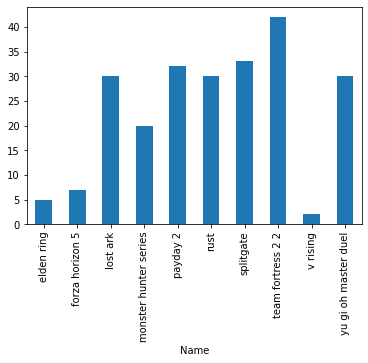

In [64]:
game_player_count_df['Month'].sort_values()
gp = game_player_count_df.groupby('Name')['Average_Monthly_Players'].count()
gp.plot.bar()

In [65]:
fig = px.line(game_player_count_df, x="Month", y="Max_Players_per_Day", color='Name')
fig.show()

In [66]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

In [228]:
fig = px.line(game_player_count_df, x="Month", y="Average_Monthly_Players", color='Name')
fig.show()

As one can see:
The popularity and therefore the Numbers of Players each Month before or After Covid 19 is only different for a few games or of crucial difference-
- Games such as Elden Ring, v rising, monster hunter series and forza horizon 5 were not released yet or no data has been collected so there is no use for that to answer our question

Lets take a look at the rest of the games:
- Yu Gi Oh Masters always peaks in April (2020 and 2021) and before April 2020, the percentage of monthly avg players was at the lowest of all time that is covered in this dataset. Since the numbers do not vary a lot here we can say that in overall retrospective covid 19 did not impact this game.
- Rust has more or less the same development like Yu Gi Oh
- Splitgate peaked around the January 2021
- Lost ark peaked during February 2022, which means that Covid did not influence the game positively or negatively.

In conclusion, we can say that covid19 did not influence the popularity of one of these games significantly. Now the next question would be, if the Regulations during that time have influenced the Loss and Gain in a way ?

### During Covid 19

In [70]:
# next lets sort out the Months and only keep March till Mai 2020
game_player_count_df = game_player_count_df[~(game_player_count_df['Month'] > '2020-05-31')]
game_player_count_df = game_player_count_df[~(game_player_count_df['Month'] < '2020-02-29')]

In [71]:
game_player_count_df

,Unnamed: 0,Name,Month,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
34,34,payday 2,2020-05-30,10069419,1003978,11.00,1342589.0
35,35,payday 2,2020-04-30,9065441,-1478580,-14.00,1208725.0
36,36,payday 2,2020-03-30,10544021,1038481,10.00,1405869.0
71,71,lost ark,2020-05-30,387379,-56450,-13.00,774758.0
72,72,lost ark,2020-04-30,443829,135,0.00,887658.0
73,73,lost ark,2020-03-30,443694,13853,3.00,887388.0
101,101,splitgate,2020-05-30,784035,10016,1.29,78404.0
102,102,splitgate,2020-04-30,774020,-33547,-4.15,77402.0
103,103,splitgate,2020-03-30,807566,9446,1.18,80757.0
134,134,rust,2020-05-30,11828098,-531297,-4.30,788540.0



To make sure that no duplicates are in the DataSet we checked and removed all of those.

In [72]:
print(game_player_count_df.duplicated())

34     False
35     False
36     False
71     False
72     False
73     False
101    False
102    False
103    False
134    False
135    False
136    False
164    False
165    False
166    False
214    False
215    False
216    False
dtype: bool


In [73]:
game_player_count_df.drop_duplicates(inplace=True)
print(game_player_count_df.shape)

(18, 7)


Even after the Removal of duplicates and NA-Rows, we still have the same amount of Data present.

Now that the DataFrame/DataSet we are using is cleaned and checked through , lets take a look at the Correlations of our Columns. To make sure, that we are able to do that , we have to check if all the Columns are really numerical values and no simple objects. If they are not, we have to change that.

In [74]:
game_player_count_df.dtypes

Unnamed: 0                               int64
Name                                    object
Month                           datetime64[ns]
Average_Monthly_Players                  int64
Monthly_Gain_Loss                        int64
Monthly_Gain_Loss_percentage           float64
Max_Players_per_Day                    float64
dtype: object

In [75]:
game_player_count_df.corr(method ='pearson')

,Unnamed: 0,Average_Monthly_Players,Monthly_Gain_Loss,Monthly_Gain_Loss_percentage,Max_Players_per_Day
Unnamed: 0,1.000000,-0.146654,-0.015906,0.139877,-0.456576
Average_Monthly_Players,-0.146654,1.000000,0.182985,0.180713,0.730090
Monthly_Gain_Loss,-0.015906,0.182985,1.000000,0.860949,0.164873
Monthly_Gain_Loss_percentage,0.139877,0.180713,0.860949,1.000000,0.089805
Max_Players_per_Day,-0.456576,0.730090,0.164873,0.089805,1.000000


In case of interpretation the correlation did not help us at all, since the correlation in our case is just a mathematical correlation.

In [76]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

In [77]:
fig = px.line(game_player_count_df, x="Month", y="Max_Players_per_Day", color='Name')
fig.show()

Now taking a deeper look at the Numbers from March till Mai of 2020, each game was influenced the following way: ( We will look t one game that would support our thesis and another game that declines it )

- Payday 2
PayDay 2 had the most players per day at the end of March 2020, in March the top Regulations in Europe were the closing and prohibiting all Entertainment Venues as well as the closing of all typed of Educational Institutions. In April we see a significant drop, since the game has dropped -15% , even though we have seen in the graph that the regulations did not change for april and most of Europe ( half of the Continent ) still closed Venues, banned Events as well as had Gyms and Restaurants closed. Now during Mai we can see that the amoount of Players in the game slightly increases again. This fact is really contradicting to our theory, since in May most of the Countries already opened up Pubs and restaurants as well as started to allow bigger Events and bigger Hang Outs/Festivals and more.

So in the Case of PayDay 2 the Regulations on Entertainment and Hobbies, as well as the number of Covid 19 infections, did not influence the growth or loss in players per month. Looking at the Game itself though, one notices that the Popularity of this Game must have increased and or decreased during the Riots and Protests which were being held in the US during Mai 2020, since the game is about a crime spree taking place in Washington DC.

- Lost Ark
Lost Ark is not a game which could be influenced by any political Situation, since it does not involve real world aspects ( such as League of Legends ). Looking at Lost Ark we can see that the popularity was slightly dropping before and during March 2020, but during April 2020 the max numbers of Players per Day was really consistent. Why could that be ? Since the game is an open world MMO game players have the chance of exploring the world and playing their own stories, especially during April of 2020 this was not possible because all activities were prohibited, restricted or banned, therefore gamers started fleeing more and more into games and kept living in those worlds. In May of 2020, the same month in which regulations started losing up, the avg players per month dropped up to -13% (around 100 000 players)

Now we see that not only the regulations influenced the games numbers of players, but also political aspects as well as the genre of game it is , now how is that going to look like for the game we are focused on: League of Legends.

## LoL Data

Now lets take a deeper look at what is actually interesting to us: The League of Legend Statistics during, after and before the peak of Covid Regulations and Numbers. To get the Monthly Player Count we researched and found a website called https://activeplayer.io/league-of-legends/, there we see the Monthly Number of Players. To get the information we have decided to use some webscraping.

(The Tutorial for that was the following : https://www.edureka.co/blog/web-scraping-with-python/#steps)

In [80]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import Request, urlopen

In [81]:
url = "https://activeplayer.io/league-of-legends/"
request_site = Request(url, headers={"User-Agent": "Mozilla/5.0"})
page = urlopen(request_site).read()
soup = BeautifulSoup(page, "html.parser")

In [82]:
months=[] #list to store month of an entry
avg_monthly_players=[] #list to store average monthly players
monthly_gain_or_loss=[] #list to store monthly gain/loss
peak_players_day = [] #list to store peak players in a day

In [83]:
table=soup.find('table', attrs={'id':'table_2'})
tbody = table.find('tbody')
trs = tbody.find_all('tr')

for a in trs:
    tds = a.findAll('td')

    month=tds[0]
    avg_players=tds[1]
    gain_or_loss=tds[2]
    peak_players=tds[4] #4 because one column of the page is not used
    months.append(month.text)
    avg_monthly_players.append(avg_players.text)
    monthly_gain_or_loss.append(gain_or_loss.text)
    peak_players_day.append(peak_players.text)

Now that we have collected all the data from the website, lets see which months have been collected as well as the other data that we have now:

In [84]:
print(f"Months: {months}")
print(f"Average Monthly Players: {avg_monthly_players}")

Months: ['Last 30 Days', 'October 30, 2022', 'September 30, 2022', 'August 30, 2022', 'July 30, 2022', 'June 30, 2022', 'May 30, 2022', 'April 30, 2022', 'March 30, 2022', 'February 28, 2022', 'January 30, 2022', 'December 30, 2021', 'November 30, 2021', 'October 30, 2021', 'September 30, 2021', 'August 30, 2021', 'July 30, 2021', 'June 30, 2021', 'May 30, 2021', 'April 30, 2021', 'March 30, 2021', 'February 28, 2021', 'January 30, 2021', 'December 30, 2020', 'November 30, 2020', 'October 30, 2020', 'September 30, 2020', 'August 30, 2020', 'July 30, 2020', 'June 30, 2020', 'May 30, 2020', 'April 30, 2020', 'March 30, 2020', 'February 28, 2020', 'January 30, 2020', 'December 30, 2020', 'November 30, 2019', 'October 30, 2019', 'September 30, 2019', 'August 30, 2019', 'July 30, 2019', 'June 30, 2019', 'May 30, 2019', 'April 30, 2019', 'March 30, 2019', 'February 28, 2019', 'January 30, 2019', 'November 30, 2018']
Average Monthly Players: ['149,980,576', '150,908,760', '151,102,355', '150,

This Data does not help us enough, so we will change the data type into a dataframe so that we can work with it better, and visualize the results to conclude and answer the question that we have.

In [85]:
lol_df = pd.DataFrame({'Month':months,'average monthly players':avg_monthly_players,'monthly gain/loss':monthly_gain_or_loss, 'peak players in a day':peak_players_day})

In [86]:
lol_df.dtypes

Month                      object
average monthly players    object
monthly gain/loss          object
peak players in a day      object
dtype: object

Here we can see that all of these are Objects, but to work with date time series as well as visualize the Numbers present we will have to clean the structure:
- Month has to be converted to datetime
- The other Columns are all floats

In [87]:
# first lets change the number columns to floats
lol_df["average monthly players"] = lol_df["average monthly players"].apply(lambda x: x.replace(',',''))
lol_df["monthly gain/loss"] = lol_df["monthly gain/loss"].apply(lambda x: x.replace(',',''))
lol_df["peak players in a day"] = lol_df["peak players in a day"].apply(lambda x: x.replace(',',''))
lol_df["average monthly players"] = pd.to_numeric(lol_df["average monthly players"], errors='coerce')
lol_df["monthly gain/loss"] = pd.to_numeric(lol_df["monthly gain/loss"], errors='coerce')
lol_df["peak players in a day"] = pd.to_numeric(lol_df["peak players in a day"], errors='coerce')

In [88]:
lol_df.dtypes

Month                       object
average monthly players      int64
monthly gain/loss          float64
peak players in a day      float64
dtype: object

In [89]:
# next lets change month to datetime and not to object
lol_df2 = lol_df.iloc[1: , :]
lol_df2['Month'] = pd.to_datetime(lol_df2['Month'])

<ipython-input-89-f718cbf2340c>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [90]:
lol_df2.dtypes

Month                      datetime64[ns]
average monthly players             int64
monthly gain/loss                 float64
peak players in a day             float64
dtype: object

Here we now have the converted Dataframe with the correct data types:

In [91]:
lol_df2.head()

,Month,average monthly players,monthly gain/loss,peak players in a day
1,2022-10-30,150908760,-193595.0,13581788.0
2,2022-09-30,151102355,972337.0,13599212.0
3,2022-08-30,150130018,223228.0,13511702.0
4,2022-07-30,149906790,-1374568.0,13491611.0
5,2022-06-30,151281358,-1670074.0,13615322.0


In [92]:
lol_df2

,Month,average monthly players,monthly gain/loss,peak players in a day
1,2022-10-30,150908760,-193595.0,13581788.0
2,2022-09-30,151102355,972337.0,13599212.0
3,2022-08-30,150130018,223228.0,13511702.0
4,2022-07-30,149906790,-1374568.0,13491611.0
5,2022-06-30,151281358,-1670074.0,13615322.0
6,2022-05-30,152951432,584771.0,13765629.0
7,2022-04-30,152366661,-946016.0,13712999.0
8,2022-03-30,153312677,-2243554.0,13798141.0
9,2022-02-28,155556231,2249220.0,14000061.0
10,2022-01-30,153307011,-1674215.0,13797631.0


Before we dig deeper we will take a look again, how the Player Count has been behaving over the span of the years we have here (2019 till 2022)

### Overall

In [93]:
import plotly.express as px

fig = px.line(lol_df2, x="Month", y="average monthly players")
fig.show()

In [94]:
fig = px.line(lol_df2, x="Month", y="monthly gain/loss")
fig.show()

### During Covid 19

Lets now take a better look during the Time of Covid 19 Regulations:

In [96]:
lol_df2 = lol_df2[~(lol_df2['Month'] > '2020-05-31')]
lol_df2 = lol_df2[~(lol_df2['Month'] < '2020-02-29')]

Now we only have the data of the 3 months that we are interested in, lets visualize that:

In [97]:
lol_df2

,Month,average monthly players,monthly gain/loss,peak players in a day
30,2020-05-30,141187161,-13437302.0,4635438.0
31,2020-04-30,154624462,9677250.0,5604008.0
32,2020-03-30,144947212,10396000.0,5184660.0


In [98]:
fig = px.line(lol_df2, x="Month", y="monthly gain/loss")
fig.show()

In [99]:
fig = px.line(lol_df2, x="Month", y="average monthly players")
fig.show()

# Overall Conclusion and Answer to our Question
Including Documentation and Story

# Story
Now to conclude:

As one knows, the spreading of the Coronavirus has lead most of the world into strong quarantine regulations. These regulations made everyone stay at home. Being made to stay at home, people started to take a bigger interest in finding new hobbies, experimenting new fields of interests and deepen there current hobbies.

Since leaving your house was an issue, all of these hobbies had to be indoor, therefore one of the booming industries next to the at-home-sports industry was the gaming market. People started to invest more into video games and sharpen their skills. But how much was the gaming industry really impacted by these changes and during which time-period was the boom the strongest? Is it really true that thanks to COVID-19 the industry started rapidly growing again?

To find an answer to our Question we first had to decide on the timespan in which we want to look at the gain and loss of popularity in the game industry. For that we collected our Ideas and thought that the during the first quarantine and first contact Europe had with the Corona Virus the impact must have been the biggest, because a lot of countries in Europe had regulations up and the Covid 19 infections were on a peak. Therefore we have decided to focus on the timezone between March of 2020 and Mai of 2020, and compare the results and findings to the time before and after the Covid 19 "core-time/zone".

![timeline](img/timeline.png)

As one can see in the image here our timeframe has been chosen correctly.
To find an answer to our question we have to know how the countries were responding to covid 19 and their rising numbers during that time, therefore we created a list which tells us how many countries had a certain regulation on going on each day during our chosen core-time. We were especially looking at those regulations which would impact a person's free time, so the closing of pubs or prohibiting any kind of events and reducing outdoor and indoor hang-outs and so on. Let's take a look at the Regulations present in the List and how strong they were represented :


Those regulations mean the following:

- StayHomeOrder = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’)
- RegionalStayHomeOrder = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’)
- StayHomeGen = Stay-at-home recommendations for the general population (which are voluntary or not enforced)
- StayHomeRiskG = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.)
- SocialCircle = Social circle/bubble to limit social contacts e.g. to limited number of households
- PrivateGatheringRestrictions = Restrictions on private gatherings
- ClosDaycare = Closure of educational institutions: daycare or nursery.
- ClosPrim = Closure of educational institutions: primary schools.
- ClosSec = Closure of educational institutions: secondary schools.
- ClosHigh = Closure of educational institutions: higher education
- MassGatherAll = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included)
- BanOnAllEvents = Interventions are in place to limit all indoor/outdoor mass/public gatherings
- IndoorOver50 = Interventions are in place to limit indoor mass/public gatherings of over 50 participants
- IndoorOver100 = Interventions are in place to limit indoor mass/public gatherings of over 100 participants
- IndoorOver500 = Interventions are in place to limit indoor mass/public gatherings of over 500 participants
- IndoorOver1000 = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants
- OutdoorOver50 = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants
- OutdoorOver100 = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants
- OutdoorOver500 = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants
- OutdoorOver1000 = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants
- ClosPubAny = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers, etc).
- EntertainmentVenues = Closure of entertainment venues
- ClosureOfPublicTransport = Closure of public transport
- GymsSportsCentres = Closure of gyms/sports centres
- HotelsAccommodation = Closure of hotels/accommodation services
- NonEssentialShops = Closures of non-essential shops
- PlaceOfWorship = Closure of places of worship
- RestaurantsCafes = Closure of restaurants and cafes/bars
- MasksVoluntaryAllSpaces = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced)
- MasksVoluntaryClosedSpaces = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced)
- MasksMandatoryAllSpaces = Protective mask use in all public spaces on mandatory basis (enforced by law)
- MasksMandatoryClosedSpaces = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law)
- Teleworking = Teleworking recommendation
- AdaptationOfWorkplace = Adaptation of workplaces (e.g. to reduce risk of transmission)
- WorkplaceClosures = Closures of workplaces
- StayHomeOrderPartial = Stay-at-home orders for the general population (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- RegionalStayHomeOrderPartial = Regional stay-at-home orders for the general population at least in one region (these are enforced and also referred to as ‘lockdown’) – partially relaxed measure
- StayHomeGenPartial = Stay-at-home recommendations for the general population (which are voluntary or not enforced) – partially relaxed measure
- StayHomeRiskGPartial = Stay-at-home recommendations for risk groups or vulnerable populations (such as the elderly, people with underlying health conditions, physically disabled people, etc.) – partially relaxed measure
- SocialCirclePartial = Social circle/bubble to limit social contacts e.g. to limited number of households – partially relaxed measure
- PrivateGatheringRestrictionsPartial = Restrictions on private gatherings – partially relaxed measure
- ClosDaycarePartial = Closure of educational institutions: daycare or nursery –partially relaxed measure
- ClosPrimPartial = Closure of educational institutions: primary schools – partially relaxed measure
- ClosSecPartial = Closure of educational institutions: secondary schools –partially relaxed measure
- ClosHighPartial = Closure of educational institutions: higher education – partially relaxed measure
- MassGatherAllPartial = Interventions are in place to limit mass/public gatherings (any interventions on mass gatherings up to 1000 participants included) – partially relaxed measure
- BanOnAllEventsPartial = Interventions are in place to limit all indoor/outdoor mass/public gatherings – partially relaxed measure
- IndoorOver50Partial = Interventions are in place to limit indoor mass/public gatherings of over 50 participants – partially relaxed measure
- IndoorOver100Partial = Interventions are in place to limit indoor mass/public gatherings of over 100 participants – partially relaxed measure
- IndoorOver500Partial = Interventions are in place to limit indoor mass/public gatherings of over 500 participants – partially relaxed measure
- IndoorOver1000Partial = Interventions are in place to limit indoor mass/public gatherings of over 1000 participants – partially relaxed measure
- OutdoorOver50Partial = Interventions are in place to limit outdoor mass/public gatherings of over 50 participants – partially relaxed measure
- OutdoorOver100Partial = Interventions are in place to limit outdoor mass/public gatherings of over 100 participants – partially relaxed measure
- OutdoorOver500Partial = Interventions are in place to limit outdoor mass/public gatherings of over 500 participants – partially relaxed measure
- OutdoorOver1000Partial = Interventions are in place to limit outdoor mass/public gatherings of over 1000 participants – partially relaxed measure
- ClosPubAnyPartial = Closure of public spaces of any kind (including restaurants, entertainment venues, non-essential shops, partial or full closure of public transport, gyms and sport centers etc) – partially relaxed measure
- EntertainmentVenuesPartial = Closure of entertainment venues – partially relaxed measure
- ClosureOfPublicTransportPartial = Closure of public transport – partially relaxed measure
- GymsSportsCentresPartial = Closure of gyms/sports centres – partially relaxed measure
- HotelsAccommodationPartial = Closure of hotels/accommodation services – partially relaxed measure
- NonEssentialShopsPartial = Closures of non-essential shops – partially relaxed measure
- PlaceOfWorshipPartial = Closure of places of worship – partially relaxed measure
- RestaurantsCafesPartial = Closure of restaurants and cafes/bars – partially relaxed measure
- MasksVoluntaryAllSpacesPartial = Protective mask use in all public spaces on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksVoluntaryClosedSpacesPartial = Protective mask use in closed public spaces/transport on voluntary basis (general recommendation not enforced) – partially relaxed measure
- MasksMandatoryAllSpacesPartial = Protective mask use in all public spaces on mandatory basis (enforced by law) – partially relaxed measure
- MasksMandatoryClosedSpacesPartial = Protective mask use in closed public spaces/transport on mandatory basis (enforced by law) – partially relaxed measure
- TeleworkingPartial = Teleworking recommendation or workplace closures – partially relaxed measure
- AdaptationOfWorkplacePartial = Adaptation of workplaces (e.g. to reduce risk of transmission) – partially relaxed measure
- WorkplaceClosuresPartial = Closures of workplaces – partially relaxed measure


We can already see those are a lot of Regulations, some that were not important to answer our question, such as mandatory Masks or Closure of Public Transport. But now lets see which Regulations were strongly present:


In [48]:
import plotly.express as px
fig = px.line(march_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

In [49]:
fig = px.line(april_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

In [50]:
fig = px.line(mai_reg_df, x="Date", y="num_countries", color='Regulation')
fig.show()

From what we can see here the following conclusions of each Month have been made:
- **Mai**

In Mai we notice a strong decrease of regulations in EU countries, especially in from mid Mai till the end of Mai. The only regulations, which were really present during the time were the Closing of Educational Institutions, in some countries we had a ban on Mass gatherings and partial closings of public places ( where partial is meant as relaxed regulations, therefore some public places were open and some werent or certain rules had to be applied ).

- **April**

April was much more filled with regulations: here again the most present one was the closing of Educational Institutions ( High Schools, Primary Schools, Kindergardens and so on ) but the most prominent ones where also closing pubs, prohibiting Mass gatherings, prohibiting Events, closing Entertainment Venues, Restaurants,Cafes, Pubs, and Gyms. Therefore the way of publicly participating in an kind of hobby was made impossible, so people stayed home and made sure to keep themselves occupied there. April was also the Month in which most countries went into a total Lockdown.

- **March**

March was the Month in which Regulations started coming up one by one in each Country. Therefore the beginning of March looks much more less intense than April and Mai. This is also the reason since most countries only came in direct contact with Covid at the end of February 2020.In March the first and also most prominent Regulations set were prohibitng Mass Gatherings and closing Entertainment Venues as well as prohibiting any kind of Events which were supposed to take place in March. This development happened from mid till end of March, meaning the beginning of March would not have such a huge impact on the numbers of players in game.


So all in all,the Team assumed that the game industry and therefore the game league of legends peaked during the Month of April. But was it really that way ? Let's take a look into the numbers we were able to collect, but before we dig deeper we have decided to analyze other Games on the market as well to see if the type of game or company behind the game also influenced the growth or loss in popularity.

At first, we decided to take a look at a few games which are currently on the market, those were:
- v rising
- forza horizon 5
- payday 2
- elden ring
- lost ark
- splitgate
- rust
- yu gi oh master duel
- monster hunter series
- team fortress 2 2

But since not all of these were released during and before the Covid-core-timezone we had chosen, we had to shorten the list.

In [67]:
fig = px.line(game_player_count_df, x="Month", y="Average_Monthly_Players", color='Name')
fig.show()

In [69]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

As one can see:
The popularity and therefore the Numbers of Players each Month before or After Covid 19 is only different for a few games or of crucial difference-
- Games such as Elden Ring, v rising, monster hunter series and forza horizon 5 were not released yet or no data has been collected so there is no use for that to answer our question

Lets take a look at the rest of the games:
- Yu Gi Oh Masters always peaks in April (2020 and 2021) and before April 2020, the percentage of monthly avg players was at the lowest of all time that is covered in this dataset. Since the numbers do not vary a lot here we can say that in overall retrospective covid 19 did not impact this game.
- Rust has more or less the same development like Yu Gi Oh
- Splitgate peaked around the January 2021
- Lost ark peaked during February 2022, which means that Covid did not influence the game positively or negatively.

In conclusion, we can say that covid19 did not influence the popularity of one of these games significantly. Now the next question would be, if the Regulations during that time have influenced the Loss and Gain in a way ?

In [78]:
fig = px.line(game_player_count_df, x="Month", y="Monthly_Gain_Loss_percentage", color='Name')
fig.show()

In [79]:
fig = px.line(game_player_count_df, x="Month", y="Average_Monthly_Players", color='Name')
fig.show()

Now taking a deeper look at the Numbers from March till Mai of 2020, each game was influenced the following way: ( We will look t one game that would support our thesis and another game that declines it )

- Payday 2
PayDay 2 had the most players per day at the end of March 2020, in March the top Regulations in Europe were the closing and prohibiting all Entertainment Venues as well as the closing of all typed of Educational Institutions. In April we see a significant drop, since the game has dropped -15% , even though we have seen in the graph that the regulations did not change for april and most of Europe ( half of the Continent ) still closed Venues, banned Events as well as had Gyms and Restaurants closed. Now during Mai we can see that the amoount of Players in the game slightly increases again. This fact is really contradicting to our theory, since in May most of the Countries already opened up Pubs and restaurants as well as started to allow bigger Events and bigger Hang Outs/Festivals and more.

So in the Case of PayDay 2 the Regulations on Entertainment and Hobbies, as well as the number of Covid 19 infections, did not influence the growth or loss in players per month. Looking at the Game itself though, one notices that the Popularity of this Game must have increased and or decreased during the Riots and Protests which were being held in the US during Mai 2020, since the game is about a crime spree taking place in Washington DC.

- Lost Ark
Lost Ark is not a game which could be influenced by any political Situation, since it does not involve real world aspects ( such as League of Legends ). Looking at Lost Ark we can see that the popularity was slightly dropping before and during March 2020, but during April 2020 the max numbers of Players per Day was really consistent. Why could that be ? Since the game is an open world MMO game players have the chance of exploring the world and playing their own stories, especially during April of 2020 this was not possible because all activities were prohibited, restricted or banned, therefore gamers started fleeing more and more into games and kept living in those worlds. In May of 2020, the same month in which regulations started losing up, the avg players per month dropped up to -13% (around 100 000 players)

We see here that if regulations influenced the growth or loss in player numbers, then it was the ones that restricted access to hobby related venues, meaning that for the general conclusion we were right.
Now we see that not only the regulations influenced the games numbers of players, but also political aspects as well as the genre of game it is , now how is that going to look like for the game we are focused on: League of Legends.

In [95]:
fig = px.line(lol_df2, x="Month", y="monthly gain/loss")
fig.show()

In this Graph we can see the monthly gain and loss of total players for the game league of legens from january 2019 until currently (October of 2022). We can see a clear peak during November 2020, since in that time the 10th season was about to end, here is an overview of seasons in the time frame we are interested in:

9	Jan, 23, 2019	Nov. 19, 2019
10	Jan. 10, 2020	Nov. 10, 2020
11	Jan. 8, 2021	Nov. 15, 2021
12	Jan. 7, 2022	Nov. 14, 2022

But we also notice that the game has never had such a peak each November, well we can assume that for November 2020 it was so high because the it was the 10 year anniversary of seasons in League of Legends, but afterwards there is a huge drop (could be due to Riot removing one of the most popular game modes: Twisted Treeline ).

Now lets take a look if any Regulations have influenced the gain and loss of players in game:


In [100]:
fig = px.line(lol_df2, x="Month", y="average monthly players")
fig.show()

In [101]:
fig = px.line(lol_df2, x="Month", y="monthly gain/loss")
fig.show()

Now what we see here is exactly what we have thought:

While more and more countries where starting to increase the number of regulations on outdoor activities and other hobby related things, the number of players was high up. But right after those regulations dropped and people were able to meet up again as well as had to go to school again, attend Matura ( in case of Austria ) and were able to do any kind of Entertainment related things, the game lost active players. We can also support and prove this theory because the number of players started to slowly increase again after summer ( a time in which loads of countries started to have more infections again and started enabling regulations for their population all over again - which was later marked as the second lockdown. )

For the game itself ( looking at the core season time ) the lockdowns were put perfectly, since the first one was at the beginning of the season and the second one at the end of the 10th season , making it easier for players who were already invested in the game to spend more time on the game itself.